

# Project: FBI Gun Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  This data comes from the FBI's National Instant Criminal BackgroundCheck System (NICS). The NICS is used by Federal Firearms Licensees (FFLs) to instantly determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into thissystem to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.
The FBI provides data on the number of firearm checks by month, state and type. The data runs from November 1988 to June 2022
The census data provides information on different population trends in US states.
>
> In the course of this analysis, I plan to find out (i). What census data is mostly associated with high gun per capita. (ii). Which states have had the highest growth in gun registrations. (iii). What is the overall trend of gun purchases.

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [143]:
# Load gun data
GunData = pd.read_csv(r'C:\Users\HP\Desktop\Project_Investigate a Dataset\gun_data.csv')
GunData.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [144]:
# Load census data
census_data = pd.read_csv(r'C:\Users\HP\Downloads\u.s.-census-data.csv')
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [145]:
GunData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [146]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [147]:
GunData.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [148]:
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [149]:
# Finding if there are duplicates in the datasets
GunData.duplicated().sum(), census_data.duplicated().sum()

(0, 3)

In [150]:
# Checking for null values in the gun dataset
GunData.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [151]:
# Checking for null values in census  dataset
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [152]:
GunData.shape, census_data.shape

((12485, 27), (85, 52))


### Data Cleaning (Replace this with more specific notes!)

In [153]:
# replacing spaces in census  data column names with underscores for easier analysis
census_data.rename(columns=lambda x: x.strip().lower().replace(' ','_'), inplace=True)
census_data.head(0)

,fact,fact_note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming


In [154]:
# dropping duplicates in census data
census_data.drop_duplicates(inplace=True)
census_data.duplicated().sum()

0

In [155]:
# dropping 'fact note' column since most of its values are missing.
census_data.drop(['fact_note'], axis=1, inplace=True)
census_data.head(0)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming


In [156]:
census_data.tail(20)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# dropping null values in census data. The null values in the census data are due to some extra information in the 'fact' column . The purpose of the extra information was to provide explainations on the dataset.
census_data.dropna(inplace=True)
census_data.isnull().sum()

fact              0
alabama           0
alaska            0
arizona           0
arkansas          0
california        0
colorado          0
connecticut       0
delaware          0
florida           0
georgia           0
hawaii            0
idaho             0
illinois          0
indiana           0
iowa              0
kansas            0
kentucky          0
louisiana         0
maine             0
maryland          0
massachusetts     0
michigan          0
minnesota         0
mississippi       0
missouri          0
montana           0
nebraska          0
nevada            0
new_hampshire     0
new_jersey        0
new_mexico        0
new_york          0
north_carolina    0
north_dakota      0
ohio              0
oklahoma          0
oregon            0
pennsylvania      0
rhode_island      0
south_carolina    0
south_dakota      0
tennessee         0
texas             0
utah              0
vermont           0
virginia          0
washington        0
west_virginia     0
wisconsin         0


In [158]:
# changing census data's index to the 'facts' column. After transposing the index usually becomes the new column header but the dataset has a numbered index and I need 'facts' column as the new column index
census_data = census_data.set_index(['fact'])
census_data

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756","96,787",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686","800,585",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,168.4,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8


In [159]:
# Census data has states as column headers while gun data has them has rows. for easier comparison between these datasets, census data will be transposed to have the columns as rows and rows as columns
census_data = census_data.T
census_data.columns.name = ''
census_data.index.name = 'state'
census_data.head()

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
state,,,,,,,,,,,,,,,,,,,,,
alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
california,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [160]:
# resetting dataframe index
census_data = census_data.reset_index()

In [161]:
census_data.shape

(50, 66)

In [162]:
census_data.describe()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
count,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
unique,50,50,50,45,50,29,29,43,40,39,...,50,50,50,50,50,50,50,49,50,50
top,alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.40%,7.10%,22.80%,25.50%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",153.9,"50,645.33","""01"""
freq,1,1,1,3,1,6,4,3,3,4,...,1,1,1,1,1,1,1,2,1,1


In [163]:
# replacing spaces, commas and parenthesis underscores for easier analysis
census_data = census_data.rename(columns=lambda x: x.strip("'").lower().replace(' ','_').replace(',',''))
census_data.head(0)

,state,population_estimates_july_1_2016__(v2016),population_estimates_base_april_1_2010__(v2016),population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016),population_census_april_1_2010,persons_under_5_years_percent_july_1_2016__(v2016),persons_under_5_years_percent_april_1_2010,persons_under_18_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_april_1_2010,persons_65_years_and_over_percent__july_1_2016__(v2016),...,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code


In [164]:
# dropping fact columns with information on trends before year 2011
census_data.drop(['population_estimates_base_april_1_2010__(v2016)',
                          'persons_under_5_years_percent_april_1_2010', 'persons_under_18_years_percent_april_1_2010',
                          'persons_65_years_and_over_percent_april_1_2010'],axis=1, inplace=True)

In [165]:
census_data.drop([ 'population_census_april_1_2010',  'female_persons_percent_april_1_2010', 'total_accommodation_and_food_services_sales_2012_($1000)',
 'total_health_care_and_social_assistance_receipts/revenue_2012_($1000)', 'total_manufacturers_shipments_2012_($1000)',
 'total_merchant_wholesaler_sales_2012_($1000)','total_retail_sales_2012_($1000)','total_retail_sales_per_capita_2012', 'all_firms_2012',
 'men-owned_firms_2012', 'women-owned_firms_2012', 'minority-owned_firms_2012', 'nonminority-owned_firms_2012', 'veteran-owned_firms_2012',
 'nonveteran-owned_firms_2012', 'population_per_square_mile_2010', 'land_area_in_square_miles_2010', 'fips_code'],axis=1, inplace=True)

In [166]:
census_data.drop([ 'housing_units_april_1_2010'],axis=1, inplace=True)

In [167]:
census_data.dtypes


state                                                                                   object
population_estimates_july_1_2016__(v2016)                                               object
population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)       object
persons_under_5_years_percent_july_1_2016__(v2016)                                      object
persons_under_18_years_percent_july_1_2016__(v2016)                                     object
persons_65_years_and_over_percent__july_1_2016__(v2016)                                 object
female_persons_percent__july_1_2016__(v2016)                                            object
white_alone_percent_july_1_2016__(v2016)                                                object
black_or_african_american_alone_percent_july_1_2016__(v2016)                            object
american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)                    object
asian_alone_percent_july_1_2016__(v2016)         

In [168]:
# fixing data types in census data 
census_data['population_estimates_july_1_2016__(v2016)'] = census_data['population_estimates_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
census_data[ 'population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)'] = census_data[ 'population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
census_data['persons_under_5_years_percent_july_1_2016__(v2016)'] = census_data['persons_under_5_years_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
census_data['persons_under_18_years_percent_july_1_2016__(v2016)'] = census_data['persons_under_18_years_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
census_data['persons_65_years_and_over_percent__july_1_2016__(v2016)'] = census_data['persons_65_years_and_over_percent__july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
census_data['female_persons_percent__july_1_2016__(v2016)'] = census_data['female_persons_percent__july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
census_data['white_alone_percent_july_1_2016__(v2016)'] = census_data['white_alone_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\2349466371.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['population_estimates_july_1_2016__(v2016)'] = census_data['population_estimates_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\2349466371.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data[ 'population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)'] = census_data[ 'population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$',

In [169]:
census_data['black_or_african_american_alone_percent_july_1_2016__(v2016)'] = census_data['black_or_african_american_alone_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)'] = census_data['american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['asian_alone_percent_july_1_2016__(v2016)'] = census_data[ 'asian_alone_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)'] = census_data['native_hawaiian_and_other_pacific_islander_alone_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['two_or_more_races_percent_july_1_2016__(v2016)'] = census_data['two_or_more_races_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['hispanic_or_latino_percent_july_1_2016__(v2016)'] = census_data['hispanic_or_latino_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('D','0').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016)'] = census_data['white_alone_not_hispanic_or_latino_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['veterans_2011-2015'] = census_data['veterans_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['foreign_born_persons_percent_2011-2015'] = census_data['foreign_born_persons_percent_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['housing_units__july_1_2016__(v2016)'] = census_data['housing_units__july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('D','0').str.replace('Z','0').str.replace('D','0').astype(float)


C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3089093406.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['black_or_african_american_alone_percent_july_1_2016__(v2016)'] = census_data['black_or_african_american_alone_percent_july_1_2016__(v2016)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3089093406.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)'] = census_data['american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)'].str.

In [170]:
census_data['building_permits_2016'] = census_data['building_permits_2016'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['households_2011-2015'] = census_data['households_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['persons_per_household_2011-2015'] = census_data['persons_per_household_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('D','0').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015'] = census_data['living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015'] = census_data['language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015'] = census_data['high_school_graduate_or_higher_percent_of_persons_age_25_years+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['bachelor\'s_degree_or_higher_percent_of_persons_age_25_years+_2011-2015'] = census_data['bachelor\'s_degree_or_higher_percent_of_persons_age_25_years+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace("'",'').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['with_a_disability_under_age_65_years_percent_2011-2015'] = census_data['with_a_disability_under_age_65_years_percent_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['persons__without_health_insurance_under_age_65_years_percent'] = census_data['persons__without_health_insurance_under_age_65_years_percent'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('D','0').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015'] = census_data['in_civilian_labor_force_total_percent_of_population_age_16_years+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015'] = census_data['in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015'] = census_data['mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['median_household_income_(in_2015_dollars)_2011-2015'] = census_data['median_household_income_(in_2015_dollars)_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3493389432.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['building_permits_2016'] = census_data['building_permits_2016'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\3493389432.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['households_2011-2015'] = census_data['households_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_1

In [171]:
census_data['per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015'] = census_data['per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['persons_in_poverty_percent'] = census_data['persons_in_poverty_percent'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['total_annual_payroll_2015_($1000)'] = census_data['total_annual_payroll_2015_($1000)'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('D','0').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['total_employment_2015'] = census_data['total_employment_2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['total_employer_establishments_2015'] = census_data['total_employer_establishments_2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['total_employment_percent_change_2014-2015'] = census_data['total_employment_percent_change_2014-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('FN','0').str.replace('D','0').astype(float)
census_data['total_nonemployer_establishments_2015'] = census_data['total_nonemployer_establishments_2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
census_data['state'] = census_data['state'].astype(str)


C:\Users\HP\AppData\Local\Temp\ipykernel_13420\389499428.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015'] = census_data['per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.replace('Z','0').str.replace('D','0').astype(float)
C:\Users\HP\AppData\Local\Temp\ipykernel_13420\389499428.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_data['persons_in_poverty_percent'] = census_data['persons_in_poverty_percent'].str.replace(',','').str.replace('%','').str.replace('$','').str.replace('"','').str.

In [172]:
census_data.dtypes


state                                                                                    object
population_estimates_july_1_2016__(v2016)                                               float64
population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016)       float64
persons_under_5_years_percent_july_1_2016__(v2016)                                      float64
persons_under_18_years_percent_july_1_2016__(v2016)                                     float64
persons_65_years_and_over_percent__july_1_2016__(v2016)                                 float64
female_persons_percent__july_1_2016__(v2016)                                            float64
white_alone_percent_july_1_2016__(v2016)                                                float64
black_or_african_american_alone_percent_july_1_2016__(v2016)                            float64
american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016)                    float64
asian_alone_percent_july_1_2016__(v2016

In [173]:
census_data.describe()

,population_estimates_july_1_2016__(v2016),population_percent_change_-_april_1_2010_(estimates_base)_to_july_1_2016__(v2016),persons_under_5_years_percent_july_1_2016__(v2016),persons_under_18_years_percent_july_1_2016__(v2016),persons_65_years_and_over_percent__july_1_2016__(v2016),female_persons_percent__july_1_2016__(v2016),white_alone_percent_july_1_2016__(v2016),black_or_african_american_alone_percent_july_1_2016__(v2016),american_indian_and_alaska_native_alone_percent_july_1_2016__(v2016),asian_alone_percent_july_1_2016__(v2016),...,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2011-2015,median_household_income_(in_2015_dollars)_2011-2015,per_capita_income_in_past_12_months_(in_2015_dollars)_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_($1000),total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015
count,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.00000,...,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01
mean,6.448927e+06,3.120700,4.696780,17.425780,11.81044,38.511740,60.397020,8.360900,1.18026,3.63118,...,45.323120,23.948000,54311.860000,28491.780000,10.05498,152827.700000,2.471459e+06,1.243008e+08,1.575040,4.855009e+05
std,7.271769e+06,3.366857,2.697349,9.936137,6.84738,21.584467,35.861896,9.917937,2.36307,5.79106,...,25.625056,3.608054,8949.529115,4103.284534,6.26358,169126.289727,2.733595e+06,1.557208e+08,1.436968,6.076460e+05
min,5.855010e+05,-1.200000,0.052000,0.197000,0.14500,0.487000,0.685000,0.020000,0.00300,0.01500,...,0.549000,16.900000,39665.000000,21057.000000,0.10700,20907.000000,2.198810e+05,1.009401e+07,-1.700000,4.814000e+04
25%,1.850106e+06,0.069250,4.825000,19.025000,10.42500,48.000000,34.175000,0.650000,0.22500,0.80000,...,50.150000,21.675000,47526.000000,25443.750000,7.80000,44034.000000,5.888890e+05,2.587806e+07,0.038250,1.215145e+05
50%,4.559320e+06,2.050000,6.000000,22.250000,15.00000,50.300000,77.400000,4.700000,0.60000,2.35000,...,58.200000,24.000000,52601.000000,27669.500000,11.35000,101256.500000,1.606934e+06,6.918848e+07,1.600000,3.014300e+05
75%,7.198768e+06,5.075000,6.400000,23.450000,16.10000,50.900000,87.275000,12.400000,1.17500,4.55000,...,61.400000,26.125000,60599.000000,30977.000000,14.25000,180991.000000,3.040622e+06,1.610169e+08,2.550000,5.096492e+05
max,3.925002e+07,10.800000,8.300000,30.200000,19.90000,51.600000,94.800000,37.700000,15.20000,37.70000,...,66.200000,32.300000,74551.000000,38803.000000,20.80000,908120.000000,1.432538e+07,8.569542e+08,4.900000,3.206958e+06


In [174]:
# dropping columns in gun data due to inconsistent and incomplete data through the years
GunData.drop(['return_to_seller_other' , 'return_to_seller_long_gun', 'return_to_seller_handgun', 'private_sale_other',
                'private_sale_long_gun', 'private_sale_handgun', 'rentals_long_gun' ,'rentals_handgun','returned_other', 
                'returned_long_gun', 'returned_handgun', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 
                'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other'], axis=1, inplace=True) 

GunData.info()                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           12485 non-null  object 
 1   state           12485 non-null  object 
 2   permit          12461 non-null  float64
 3   permit_recheck  1100 non-null   float64
 4   handgun         12465 non-null  float64
 5   long_gun        12466 non-null  float64
 6   other           5500 non-null   float64
 7   multiple        12485 non-null  int64  
 8   admin           12462 non-null  float64
 9   totals          12485 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 975.5+ KB


In [175]:
GunData.drop(['other'], axis=1, inplace=True)

In [176]:
GunData.drop(['permit_recheck'], axis=1, inplace=True)

In [177]:
GunData.isnull().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
multiple     0
admin       23
totals       0
dtype: int64

In [178]:
GunData.describe()

,permit,handgun,long_gun,multiple,admin,totals
count,12461.000000,12465.000000,12466.000000,12485.000000,12462.000000,12485.000000
mean,6413.629404,5940.881107,7810.847585,268.603364,58.898090,21595.725911
std,23752.338269,8618.584060,9309.846140,783.185073,604.814818,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,865.000000,2078.250000,15.000000,0.000000,4638.000000
50%,518.000000,3059.000000,5122.000000,125.000000,0.000000,12399.000000
75%,4272.000000,7280.000000,10380.750000,301.000000,0.000000,25453.000000
max,522188.000000,107224.000000,108058.000000,38907.000000,28083.000000,541978.000000


In [179]:
# replacing null values in different columns with the column mean
GunData['permit'].fillna('6414', inplace=True)
GunData['handgun'].fillna('5941', inplace=True)
GunData['long_gun'].fillna('7811', inplace=True)
GunData['admin'].fillna('59', inplace=True)

GunData.isnull().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
multiple    0
admin       0
totals      0
dtype: int64

In [180]:
# fixing data types in gun data
GunData.dtypes
GunData['state'] = GunData['state'].astype(str)
GunData['permit'] = GunData['permit'].astype(int)
GunData['handgun'] = GunData['handgun'].astype(int)
GunData['long_gun'] = GunData['long_gun'].astype(int)
GunData['admin'] = GunData['admin'].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis


###  Which States Have The Highest Growth In Gun Registrations

In [181]:
# # regitration_growth  = present year - previous year
# previous year = 1988-11
# present year = 2017-09

In [182]:
# convert month column to datetime
GunData['month'] = pd.to_datetime(GunData['month'], format='%Y-%m')

In [183]:
# filtering data to get previous year
previous_year = GunData.loc[(GunData['month'] >= '1988-11')
                             & (GunData['month'] < '1999-01')]

In [184]:
previous_year = previous_year.groupby('state').totals.sum()
previous_year.sort_values(ascending=False)

state
Texas                   82399
California              67445
Pennsylvania            48317
Illinois                41477
North Carolina          38943
Alabama                 36568
Ohio                    32481
Florida                 32341
Kentucky                31869
Michigan                30596
Louisiana               27642
Mississippi             26097
Virginia                25194
Tennessee               24773
Missouri                24087
Colorado                23798
Indiana                 22518
Arkansas                21752
Oklahoma                20075
Arizona                 17453
Wisconsin               15442
New York                14736
Iowa                    14650
West Virginia           14194
Oregon                  14024
Kansas                  12386
Minnesota               12116
Washington              12002
Utah                    10682
South Carolina           9565
New Mexico               9033
Maryland                 9007
Idaho                    7339
Conn

In [185]:
# filtering data to get present year registrations
present_year = GunData.loc[(GunData['month'] <= '2017-09')
                            & (GunData['month'] > '2017-08')]

In [186]:
present_year = present_year.groupby('state').totals.sum()
present_year.sort_values(ascending=False)

state
Kentucky                398706
Texas                   128260
California              123506
Illinois                116449
Florida                  77390
Pennsylvania             77003
Tennessee                50945
Ohio                     49942
Indiana                  48524
Minnesota                44552
Washington               43049
Missouri                 37571
Wisconsin                37506
North Carolina           37325
Michigan                 36944
Virginia                 36446
Colorado                 35873
Georgia                  35371
Alabama                  32019
New York                 30703
Arizona                  28394
Louisiana                27821
Oregon                   27277
South Carolina           25930
Oklahoma                 23371
Utah                     20041
Arkansas                 17747
Mississippi              17491
West Virginia            16723
Massachusetts            15460
Idaho                    14938
Kansas                   12856
Ne

In [187]:
# highest increase in registration
increase_reg = present_year - previous_year
highincrease_reg = increase_reg.sort_values(ascending=False)
highincrease_reg = highincrease_reg.head(10)
highincrease_reg

state
Kentucky        366837
Illinois         74972
California       56061
Texas            45861
Florida          45049
Minnesota        32436
Georgia          31552
Washington       31047
Pennsylvania     28686
Tennessee        26172
Name: totals, dtype: int64

In [188]:
def bar_plot_by(x, heights, title, xlabel, ylabel):
    fig = plt.subplots(figsize=(13,8))
    plt.bar(x, heights)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


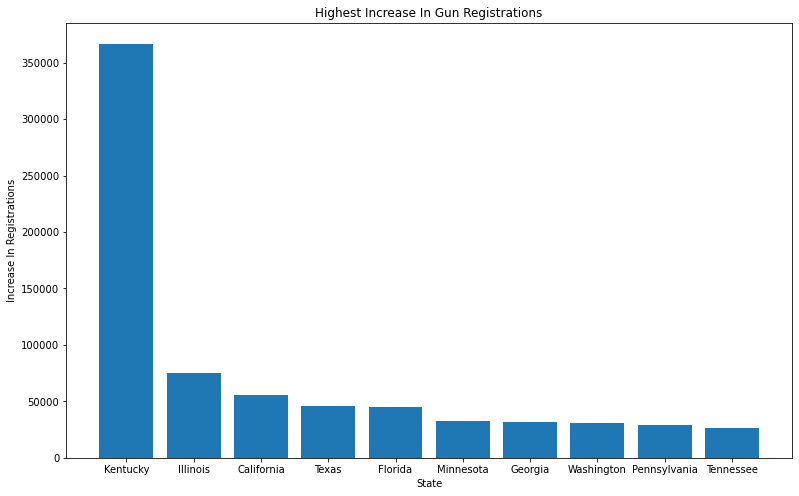

In [189]:
bar_plot_by(highincrease_reg.index, highincrease_reg, 'Highest Increase In Gun Registrations', 'State', 'Increase In Registrations' )

 Kentucky had the highest growth in gun registration with a total registration growth rate of '366837'

In [190]:
# lowest growth in gun registrations
lowincrease_reg = increase_reg.sort_values(ascending=True)
lowincrease_reg = lowincrease_reg.head(10)
lowincrease_reg

state
Mississippi            -8606
Iowa                   -4675
Alabama                -4549
Arkansas               -4005
North Carolina         -1618
Nebraska               -1310
Virgin Islands             9
Mariana Islands           16
District of Columbia      61
Guam                     126
Name: totals, dtype: int64

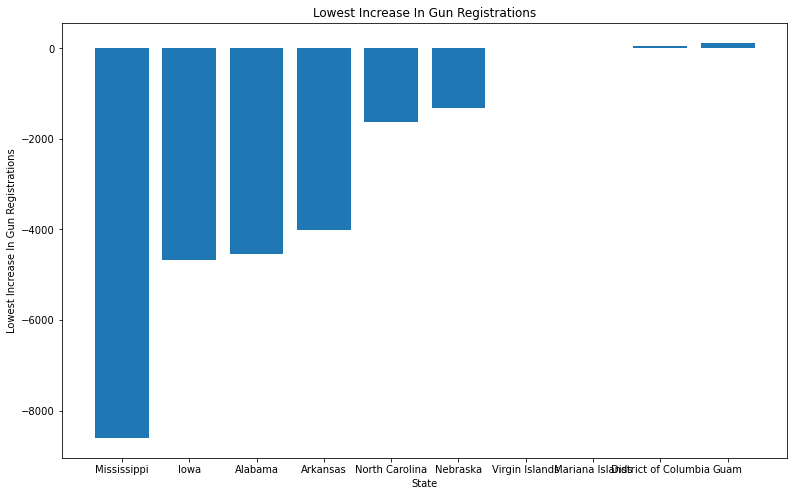

In [191]:
bar_plot_by(lowincrease_reg.index, lowincrease_reg, 'Lowest Increase In Gun Registrations', 'State', 'Lowest Increase In Gun Registrations')

 Some countries experienced no growth in gun registrations but rather experienced a decrease. These countries include: Mississippi, Iowa, Alabama, Arkansas, North Carolina and Nebraska.
Virgin Islands experienced the lowest growth in gun registrations

### What Census Data Is Mostly Associated With High Gun Per Capita ?

In [192]:
# guns per  capita = [total no of guns]/[total population
census_data = census_data.rename(columns=lambda x: x.strip("'").lower().replace('(','' ).replace(')',''))
census_data.head()


,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,...,in_civilian_labor_force_female_percent_of_population_age_16_years+_2011-2015,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015
0,alabama,4863300.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,...,53.0,24.4,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0
1,alaska,741894.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,...,65.0,19.0,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0
2,arizona,6931071.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,...,54.5,24.8,50255.0,25848.0,16.4,136352.0,2295186.0,102671393.0,2.4,451951.0
3,arkansas,2988248.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,...,53.3,21.6,41371.0,22798.0,17.2,65175.0,1003113.0,39451191.0,1.1,198380.0
4,california,39250017.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,...,57.2,28.0,61818.0,30318.0,14.3,908120.0,14325377.0,856954246.0,3.5,3206958.0


In [193]:
# finding total number of guns
total_no_guns = GunData.groupby('state').totals.sum()
total_no_guns

state
Alabama                  6706079
Alaska                   1137643
Arizona                  4425714
Arkansas                 3752633
California              19014063
Colorado                 6058482
Connecticut              3168126
Delaware                  491369
District of Columbia        5601
Florida                 11695777
Georgia                  7209942
Guam                       14997
Hawaii                    197580
Idaho                    1968134
Illinois                15471534
Indiana                  7737172
Iowa                     2297156
Kansas                   2624669
Kentucky                29762434
Louisiana                4705057
Maine                    1257457
Mariana Islands              462
Maryland                 2035652
Massachusetts            2571321
Michigan                 7254279
Minnesota                6279271
Mississippi              3576312
Missouri                 6549018
Montana                  1884124
Nebraska                 1136209
Neva

In [194]:
# finding total population
total_population = census_data.groupby('state').population_estimates_july_1_2016__v2016.sum()
total_population.shape

(50,)

In [195]:
total_no_guns.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [196]:
total_population.index

Index(['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado',
       'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
       'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode_island', 'south_carolina', 'south_dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object', name='state')

 States 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands' and 'District of Columbia' exist in total_no_guns but not in total_population thereby causing the length mismatch. These states will be dropped from total_no_of_guns

In [197]:
total_no_guns.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], axis=0, inplace=True)

In [198]:
# due to a 'length mismatch', I was unable to assign the same index to both seriies
total_population.index = total_no_guns.index

In [199]:
# finding guns per capital
gun_per_capita = total_no_guns / total_population
gun_per_capita

state
Alabama           1.378915
Alaska            1.533431
Arizona           0.638532
Arkansas          1.255797
California        0.484435
Colorado          1.093481
Connecticut       0.885829
Delaware          0.516109
Florida           0.567414
Georgia           0.699290
Hawaii            0.138307
Idaho             1.169323
Illinois          1.208568
Indiana           1.166457
Iowa              0.732817
Kansas            0.902789
Kentucky          6.707822
Louisiana         1.004996
Maine             0.944406
Maryland          0.338348
Massachusetts     0.377482
Michigan          0.730667
Minnesota         1.137559
Mississippi       1.196601
Missouri          1.074843
Montana           1.807279
Nebraska          0.595773
Nevada            0.589035
New Hampshire     1.186061
New Jersey        0.128107
New Mexico        0.997874
New York          0.235187
North Carolina    0.766517
North Dakota      1.250000
Ohio              0.728644
Oklahoma          1.168442
Oregon            0.91

In [200]:
# converting the series to a data frame
gun_per_capita = pd.DataFrame(gun_per_capita)

In [201]:
gun_per_capita.head()

,0
state,
Alabama,1.378915
Alaska,1.533431
Arizona,0.638532
Arkansas,1.255797
California,0.484435


In [202]:
gun_per_capita.reset_index()

,state,0
0,Alabama,1.378915
1,Alaska,1.533431
2,Arizona,0.638532
3,Arkansas,1.255797
4,California,0.484435
5,Colorado,1.093481
6,Connecticut,0.885829
7,Delaware,0.516109
8,Florida,0.567414
9,Georgia,0.699290


In [203]:
# renaming columns for easy analysis
gun_per_capita.columns = ['gun_per_cap']
gun_per_capita.head(0)

,gun_per_cap
state,


In [204]:
 # adding gun_per_capita to census data
 census_data['gun_per_cap'] = gun_per_capita['gun_per_cap']
 census_data.head()

,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,...,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap
0,alabama,4863300.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,...,24.4,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0,NaN
1,alaska,741894.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,...,19.0,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0,NaN
2,arizona,6931071.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,...,24.8,50255.0,25848.0,16.4,136352.0,2295186.0,102671393.0,2.4,451951.0,NaN
3,arkansas,2988248.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,...,21.6,41371.0,22798.0,17.2,65175.0,1003113.0,39451191.0,1.1,198380.0,NaN
4,california,39250017.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,...,28.0,61818.0,30318.0,14.3,908120.0,14325377.0,856954246.0,3.5,3206958.0,NaN


In [205]:
gun_per_capita.index =census_data.index

In [206]:
 census_data['gun_per_cap'] = gun_per_capita['gun_per_cap']
 census_data.head()

,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,...,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap
0,alabama,4863300.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,...,24.4,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0,1.378915
1,alaska,741894.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,...,19.0,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0,1.533431
2,arizona,6931071.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,...,24.8,50255.0,25848.0,16.4,136352.0,2295186.0,102671393.0,2.4,451951.0,0.638532
3,arkansas,2988248.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,...,21.6,41371.0,22798.0,17.2,65175.0,1003113.0,39451191.0,1.1,198380.0,1.255797
4,california,39250017.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,...,28.0,61818.0,30318.0,14.3,908120.0,14325377.0,856954246.0,3.5,3206958.0,0.484435


high gun per capita is  75% of gun per capita to max
>high = 75% - max gun per capita
>
>medium = 50% - 75% gun per capita

>moderately high = 25% - 50% gun per capita

>low = lowest 25% gun per capita

In [207]:
census_datanew = pd.DataFrame(census_data)
census_datanew = census_datanew.reset_index()
census_datanew.head()


,index,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,...,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap
0,0,alabama,4863300.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,...,24.4,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0,1.378915
1,1,alaska,741894.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,...,19.0,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0,1.533431
2,2,arizona,6931071.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,...,24.8,50255.0,25848.0,16.4,136352.0,2295186.0,102671393.0,2.4,451951.0,0.638532
3,3,arkansas,2988248.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,...,21.6,41371.0,22798.0,17.2,65175.0,1003113.0,39451191.0,1.1,198380.0,1.255797
4,4,california,39250017.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,...,28.0,61818.0,30318.0,14.3,908120.0,14325377.0,856954246.0,3.5,3206958.0,0.484435


In [208]:
census_datanew.drop(['index'], axis=1, inplace=True)
census_datanew.head(5)

,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,...,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap
0,alabama,4863300.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,...,24.4,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0,1.378915
1,alaska,741894.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,...,19.0,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0,1.533431
2,arizona,6931071.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,...,24.8,50255.0,25848.0,16.4,136352.0,2295186.0,102671393.0,2.4,451951.0,0.638532
3,arkansas,2988248.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,...,21.6,41371.0,22798.0,17.2,65175.0,1003113.0,39451191.0,1.1,198380.0,1.255797
4,california,39250017.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,...,28.0,61818.0,30318.0,14.3,908120.0,14325377.0,856954246.0,3.5,3206958.0,0.484435


In [209]:
census_datanew = census_datanew.reset_index()

In [210]:
census_datanew

,index,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,...,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap
0,0,alabama,4863300.0,1.700,6.000,22.600,16.100,51.600,69.300,26.800,...,24.4,43623.0,24091.0,17.100,98540.0,1634391.0,67370353.0,1.900,322025.0,1.378915
1,1,alaska,741894.0,4.500,7.300,25.200,10.400,47.700,66.100,3.800,...,19.0,72515.0,33413.0,9.900,20907.0,267999.0,15643303.0,0.400,55521.0,1.533431
2,2,arizona,6931071.0,8.400,6.300,23.500,16.900,50.300,83.300,4.900,...,24.8,50255.0,25848.0,16.400,136352.0,2295186.0,102671393.0,2.400,451951.0,0.638532
3,3,arkansas,2988248.0,2.500,6.400,23.600,16.300,50.900,79.400,15.700,...,21.6,41371.0,22798.0,17.200,65175.0,1003113.0,39451191.0,1.100,198380.0,1.255797
4,4,california,39250017.0,5.400,6.300,23.200,13.600,50.300,72.700,6.500,...,28.0,61818.0,30318.0,14.300,908120.0,14325377.0,856954246.0,3.500,3206958.0,0.484435
5,5,colorado,5540545.0,10.200,6.100,22.800,13.400,49.700,87.500,4.500,...,24.8,60629.0,32217.0,11.000,161737.0,2253795.0,117539555.0,3.300,480847.0,1.093481
6,6,connecticut,3576452.0,0.100,5.200,21.100,16.100,51.200,80.600,11.800,...,25.4,70331.0,38803.0,9.800,89232.0,1503102.0,92555072.0,1.200,272809.0,0.885829
7,7,delaware,952065.0,6.000,5.800,21.500,17.500,51.600,70.100,22.600,...,25.5,60509.0,30554.0,11.700,24852.0,397385.0,21305227.0,1.500,60734.0,0.516109
8,8,florida,20612439.0,9.600,5.500,20.100,19.900,51.100,77.600,16.800,...,26.4,47507.0,26829.0,14.700,532830.0,7777990.0,337074525.0,4.500,2040339.0,0.567414
9,9,georgia,10310371.0,6.400,6.400,24.400,13.100,51.300,61.200,32.000,...,27.4,49620.0,25737.0,16.000,224593.0,3692490.0,174839354.0,4.000,870897.0,0.699290


In [211]:
census_data.describe()

,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,asian_alone_percent_july_1_2016__v2016,...,mean_travel_time_to_work_minutes_workers_age_16_years+_2011-2015,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap
count,5.000000e+01,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.00000,50.00000,...,50.000000,50.000000,50.000000,50.00000,50.000000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000
mean,6.448927e+06,3.120700,4.696780,17.425780,11.81044,38.511740,60.397020,8.360900,1.18026,3.63118,...,23.948000,54311.860000,28491.780000,10.05498,152827.700000,2.471459e+06,1.243008e+08,1.575040,4.855009e+05,1.030104
std,7.271769e+06,3.366857,2.697349,9.936137,6.84738,21.584467,35.861896,9.917937,2.36307,5.79106,...,3.608054,8949.529115,4103.284534,6.26358,169126.289727,2.733595e+06,1.557208e+08,1.436968,6.076460e+05,0.908643
min,5.855010e+05,-1.200000,0.052000,0.197000,0.14500,0.487000,0.685000,0.020000,0.00300,0.01500,...,16.900000,39665.000000,21057.000000,0.10700,20907.000000,2.198810e+05,1.009401e+07,-1.700000,4.814000e+04,0.128107
25%,1.850106e+06,0.069250,4.825000,19.025000,10.42500,48.000000,34.175000,0.650000,0.22500,0.80000,...,21.675000,47526.000000,25443.750000,7.80000,44034.000000,5.888890e+05,2.587806e+07,0.038250,1.215145e+05,0.697868
50%,4.559320e+06,2.050000,6.000000,22.250000,15.00000,50.300000,77.400000,4.700000,0.60000,2.35000,...,24.000000,52601.000000,27669.500000,11.35000,101256.500000,1.606934e+06,6.918848e+07,1.600000,3.014300e+05,0.909571
75%,7.198768e+06,5.075000,6.400000,23.450000,16.10000,50.900000,87.275000,12.400000,1.17500,4.55000,...,26.125000,60599.000000,30977.000000,14.25000,180991.000000,3.040622e+06,1.610169e+08,2.550000,5.096492e+05,1.181876
max,3.925002e+07,10.800000,8.300000,30.200000,19.90000,51.600000,94.800000,37.700000,15.20000,37.70000,...,32.300000,74551.000000,38803.000000,20.80000,908120.000000,1.432538e+07,8.569542e+08,4.900000,3.206958e+06,6.707822


In [212]:
# bin edges that will be used to cut the data into groups
bin_edges = [0.128107, 0.697868, 0.909571, 1.181876, 6.707822]

# labels for the four gun per capita groups
bin_names = ['low', 'moderately_low', 'medium', 'high']

#creating gun per capita level grade column
census_data['gun_per_cap_level'] = pd.cut(census_data['gun_per_cap'], bin_edges, labels=bin_names)
census_data.head()

,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,...,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap,gun_per_cap_level
0,alabama,4863300.0,1.7,6.0,22.6,16.1,51.6,69.3,26.8,0.7,...,43623.0,24091.0,17.1,98540.0,1634391.0,67370353.0,1.9,322025.0,1.378915,high
1,alaska,741894.0,4.5,7.3,25.2,10.4,47.7,66.1,3.8,15.2,...,72515.0,33413.0,9.9,20907.0,267999.0,15643303.0,0.4,55521.0,1.533431,high
2,arizona,6931071.0,8.4,6.3,23.5,16.9,50.3,83.3,4.9,5.4,...,50255.0,25848.0,16.4,136352.0,2295186.0,102671393.0,2.4,451951.0,0.638532,low
3,arkansas,2988248.0,2.5,6.4,23.6,16.3,50.9,79.4,15.7,1.0,...,41371.0,22798.0,17.2,65175.0,1003113.0,39451191.0,1.1,198380.0,1.255797,high
4,california,39250017.0,5.4,6.3,23.2,13.6,50.3,72.7,6.5,1.7,...,61818.0,30318.0,14.3,908120.0,14325377.0,856954246.0,3.5,3206958.0,0.484435,low


In [213]:
high_gun_per_cap = census_data.query('gun_per_cap_level == "high"')
high_gun_per_cap

,state,population_estimates_july_1_2016__v2016,population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016,persons_under_5_years_percent_july_1_2016__v2016,persons_under_18_years_percent_july_1_2016__v2016,persons_65_years_and_over_percent__july_1_2016__v2016,female_persons_percent__july_1_2016__v2016,white_alone_percent_july_1_2016__v2016,black_or_african_american_alone_percent_july_1_2016__v2016,american_indian_and_alaska_native_alone_percent_july_1_2016__v2016,...,median_household_income_in_2015_dollars_2011-2015,per_capita_income_in_past_12_months_in_2015_dollars_2011-2015,persons_in_poverty_percent,total_employer_establishments_2015,total_employment_2015,total_annual_payroll_2015_$1000,total_employment_percent_change_2014-2015,total_nonemployer_establishments_2015,gun_per_cap,gun_per_cap_level
0,alabama,4863300.0,1.700,6.000,22.600,16.100,51.600,69.300,26.800,0.700,...,43623.0,24091.0,17.100,98540.0,1634391.0,67370353.0,1.900,322025.0,1.378915,high
1,alaska,741894.0,4.500,7.300,25.200,10.400,47.700,66.100,3.800,15.200,...,72515.0,33413.0,9.900,20907.0,267999.0,15643303.0,0.400,55521.0,1.533431,high
3,arkansas,2988248.0,2.500,6.400,23.600,16.300,50.900,79.400,15.700,1.000,...,41371.0,22798.0,17.200,65175.0,1003113.0,39451191.0,1.100,198380.0,1.255797,high
12,illinois,12801539.0,-0.200,6.000,22.900,14.600,50.900,77.200,14.700,0.600,...,57574.0,30494.0,13.000,318266.0,5427549.0,289183546.0,2.200,968330.0,1.208568,high
23,mississippi,2988726.0,0.700,6.300,24.100,15.100,51.500,59.300,37.700,0.600,...,39665.0,21057.0,20.800,58662.0,926391.0,33948151.0,1.600,211955.0,1.196601,high
25,montana,1042520.0,5.400,6.000,21.800,17.700,49.700,89.200,0.600,6.600,...,47169.0,26381.0,13.300,37270.0,375041.0,14227065.0,3.100,86969.0,1.807279,high
28,new_hampshire,1334795.0,1.400,4.800,19.500,17.000,50.500,93.800,1.500,0.300,...,66779.0,34362.0,7.300,37669.0,576424.0,28076320.0,2.300,104437.0,1.186061,high
33,north_dakota,757952.0,0.127,0.073,0.233,0.145,0.487,0.879,0.029,0.055,...,57181.0,32035.0,0.107,24848.0,365893.0,17184756.0,0.014,53263.0,1.250000,high
40,south_dakota,865454.0,0.063,0.071,0.246,0.160,0.496,0.852,0.020,0.090,...,50957.0,26747.0,0.133,26511.0,353540.0,13812997.0,0.016,64006.0,1.404710,high
43,utah,3051217.0,10.400,8.300,30.200,10.500,49.700,91.100,1.400,1.600,...,60727.0,24686.0,10.200,75463.0,1203954.0,51453266.0,4.900,216280.0,1.421817,high


<AxesSubplot:title={'center':'Relationship between White Population and Gun per Capita'}, xlabel='white_alone_not_hispanic_or_latino_percent_july_1_2016__v2016', ylabel='gun_per_cap'>

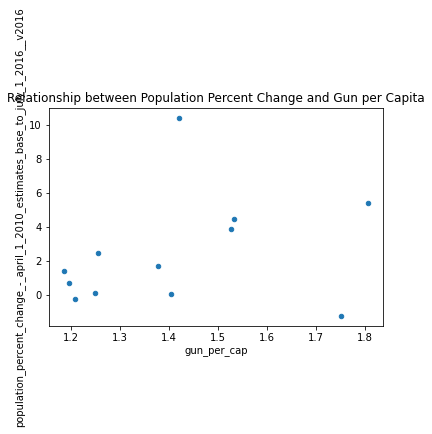

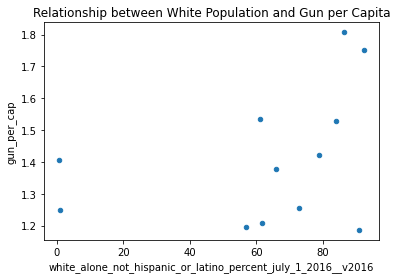

In [214]:
# plotting the relationship of hgp with different census trends
from turtle import title
high_gun_per_cap.plot(x='gun_per_cap', y='population_percent_change_-_april_1_2010_estimates_base_to_july_1_2016__v2016',title= 'Relationship between Population Percent Change and Gun per Capita', kind='scatter')
high_gun_per_cap.plot(x='white_alone_not_hispanic_or_latino_percent_july_1_2016__v2016', y='gun_per_cap', title= 'Relationship between White Population and Gun per Capita', kind='scatter')


<AxesSubplot:title={'center':'Relationship between Percentage of Foreign Borns and Gun per Capita'}, xlabel='foreign_born_persons_percent_2011-2015', ylabel='gun_per_cap'>

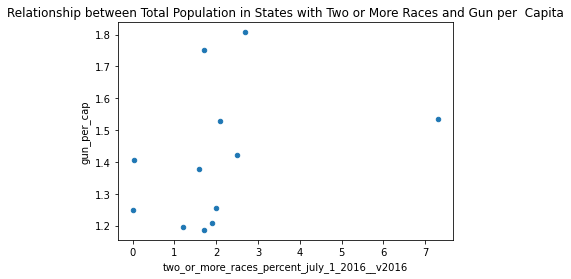

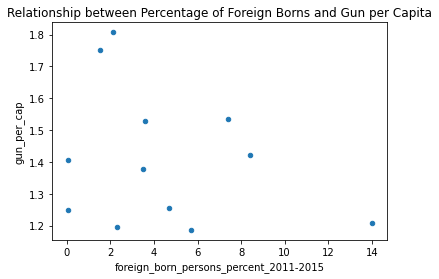

In [215]:
high_gun_per_cap.plot(x='two_or_more_races_percent_july_1_2016__v2016', y='gun_per_cap', title='Relationship between Total Population in States with Two or More Races and Gun per  Capita', kind='scatter')
high_gun_per_cap.plot(x='foreign_born_persons_percent_2011-2015', y='gun_per_cap', title='Relationship between Percentage of Foreign Borns and Gun per Capita', kind='scatter')


High gun per capita has a slightly positive correlation with population percent change, foreign born persons percent, percentage of white people living alone and percentage of two or more races present in a country. This means that when these trends or variables increase, there is a corresponding increase in gun per capita



### WHAT IS THE OVERALL TREND IN GUN REGISTRATIONS

In [216]:
handgun = GunData['handgun'].sum()
long_gun = GunData['long_gun'].sum()
multiple = GunData['multiple'].sum()

In [217]:
handgun, long_gun, multiple

(74171903, 97518435, 3353513)

Text(0, 0.5, 'Number of Registrations')

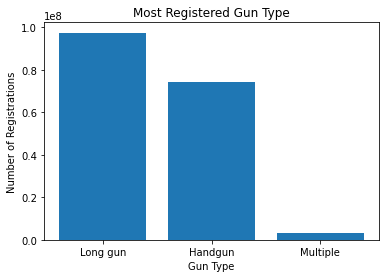

In [218]:
locations = [2,1,3]
heights = [handgun, long_gun, multiple]
labels = ['Handgun', 'Long gun', 'Multiple']
plt.bar(locations, heights, tick_label = labels)
plt.title('Most Registered Gun Type')
plt.xlabel('Gun Type')
plt.ylabel('Number of Registrations')

The most registered gun type is the LONG GUN with a total registration of 97518435 while the least registered gun type is the multiple with a total registration of 3353513. 
NB: It should be noted that the multiple gun type registration is a combination of the other types of guns (i.e handgun and long gun)
The handgun had a total registration of 74171903.

In [219]:
# States with the highest gun registrations (top 10)
state_registrations = GunData.groupby('state').totals.sum()
state_registrations = state_registrations.sort_values(ascending=False)
top_10_state_registrations = state_registrations.head(10)
top_10_state_registrations

state
Kentucky          29762434
Texas             19435186
California        19014063
Illinois          15471534
Pennsylvania      13133876
Florida           11695777
Ohio               8462744
North Carolina     7777689
Indiana            7737172
Tennessee          7311293
Name: totals, dtype: int64

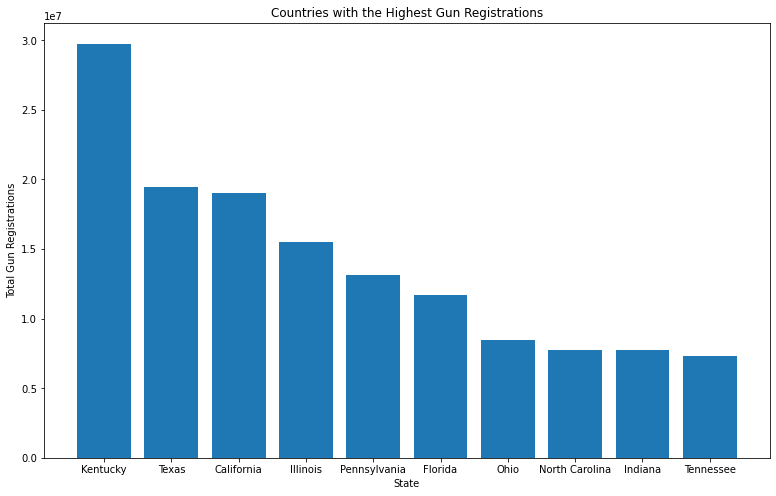

In [220]:
bar_plot_by(top_10_state_registrations.index, top_10_state_registrations, 'Countries with the Highest Gun Registrations', 'State', 'Total Gun Registrations')

Kentucky had the highest total gun registrations with a sum of 29762434.

In [221]:
# States with the lowest gun registrations
state_registrations = GunData.groupby('state').totals.sum()
state_registrations = state_registrations.sort_values(ascending=True)
bottom_10_state_registrations = state_registrations.head(10)

Text(0, 0.5, 'Total Gun Registrations')

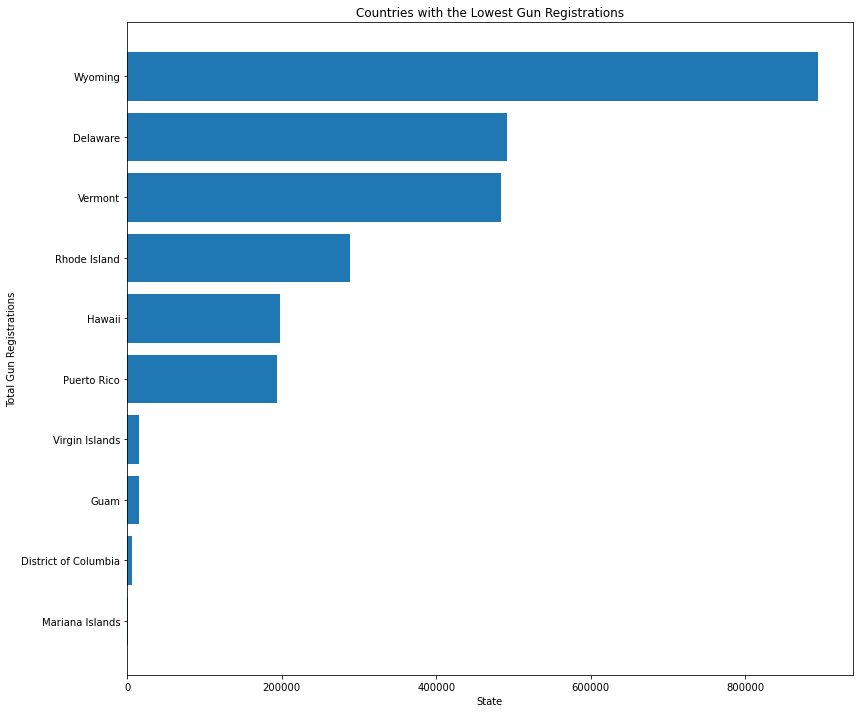

In [222]:
plt.subplots(figsize=(13,12))
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
heights = bottom_10_state_registrations
labels = bottom_10_state_registrations.index
plt.barh(locations, heights, tick_label = labels)
plt.title('Countries with the Lowest Gun Registrations')
plt.xlabel('State')
plt.ylabel('Total Gun Registrations')

The Mariana Islands had the lowest total gun registrations with a sum of 462.

<a id='conclusions'></a>
## Conclusions

From this analysis, it was discovered that  communities with white people living alone with no hispanic or latino races , high percentage of foreign born people, high percentage of two or more races and a high percentage of population growth are more likely to have a high gun per capita. The highest gun per capita value is 6.707822.
It was also discovered that Kentucky had the highest gun registrations while the Mariana Islands had the lowest. The most registered gun type is the long gun. 

## Limitation
There were irregularities in the dataset. There was a lot of missing information on registered gun types especially in the earlier years and these columns had to be dropped. This is can reduce the statistical power of the analysis and show unintentional bias towards relationships drawn and insights gathered.